<a href="https://colab.research.google.com/github/veiro/ADS2020/blob/master/prediccion/3_Prueba_de_prediccion_categorico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Utilizar tecnicas de ml para prededir 2 atributos: uno categorico y otro numerico.

Obtener metricas de que tan bien funciona para la prediccion en el dataset - original.

# Trabajo en siguiente iteracion
Luego de hacer imputacion de datos con los algoritmos GAIN y MIDA se obtiene el dataset-GAIN y dataset-MIDA.

Se va a comporar las metricas de prediccion en:
- dataset - original.
- dataset-GAIN
- dataset-MIDA

# Configuracion ambiente

In [11]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = False

In [12]:
!pip install pycaret
#https://pycaret.gitbook.io/docs/get-started/tutorials

In [13]:
import os
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from google.colab import drive

from datetime import datetime


# Preprocesamiento datos

In [14]:
if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"
else:
  PATH_DATA_PROCESADA = "/mnt"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
%%time
data_filepath = PATH_DATA_PROCESADA+'/csse_covid_19_data.csv'
data_full = pandas.read_csv(data_filepath)


CPU times: user 6.01 s, sys: 789 ms, total: 6.8 s
Wall time: 7.09 s


In [16]:
%%time
data_sin_columnas_completas = data_full.drop(['FIPS', 'Admin2', 'Recovered', 'Active', 'Combined_Key'], axis=1)
data_sin_null = data_sin_columnas_completas.dropna(subset=['Province_State', 'Lat', 'Long_', 'Incident_Rate', 'Case_Fatality_Ratio'])


CPU times: user 803 ms, sys: 140 ms, total: 943 ms
Wall time: 934 ms


#Prediccion de un campo categorico

En base a los dato
(**Deaths	 Province_State	Last_Update	Lat	Long_	Confirmed		Incident_Rate	Case_Fatality_Ratio	date**) el objetivo es predecir **Country_Region**

------------

Basado en el tutorial https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb#scrollTo=4181de41&uniqifier=1

In [17]:
# para hacer pruebas bajo la cantidad
if(MODO_DESARROLLO):
   data =  data_sin_null.sample(n=10000, random_state=1)
else:
  data = data_sin_null

df_train, df_test = train_test_split(data, test_size=0.30, random_state=42)

In [22]:
%%time
from pycaret.classification import *
s = setup(data, target = 'Country_Region', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,Country_Region
2,Target type,Multiclass
3,Target mapping,"Australia: 0, Belgium: 1, Brazil: 2, Canada: 3, Chile: 4, China: 5, Colombia: 6, Denmark: 7, France: 8, Germany: 9, India: 10, Italy: 11, Japan: 12, Malaysia: 13, Mexico: 14, Netherlands: 15, New Zealand: 16, Pakistan: 17, Peru: 18, Russia: 19, Spain: 20, Sweden: 21, US: 22, Ukraine: 23, United Kingdom: 24"
4,Original data shape,"(2992223, 10)"
5,Transformed data shape,"(2992223, 10)"
6,Transformed train set shape,"(2094556, 10)"
7,Transformed test set shape,"(897667, 10)"
8,Numeric features,6
9,Categorical features,3


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [27]:
%%time
best = compare_models(include  = ['dt', 'rf', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,15.9230
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,76.5710
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,30.9200
lightgbm,Light Gradient Boosting Machine,0.9351,0.9001,0.9351,0.9493,0.9393,0.8176,0.8193,114.7700


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

CPU times: user 3h 42min 15s, sys: 1min 25s, total: 3h 43min 40s
Wall time: 40min 1s


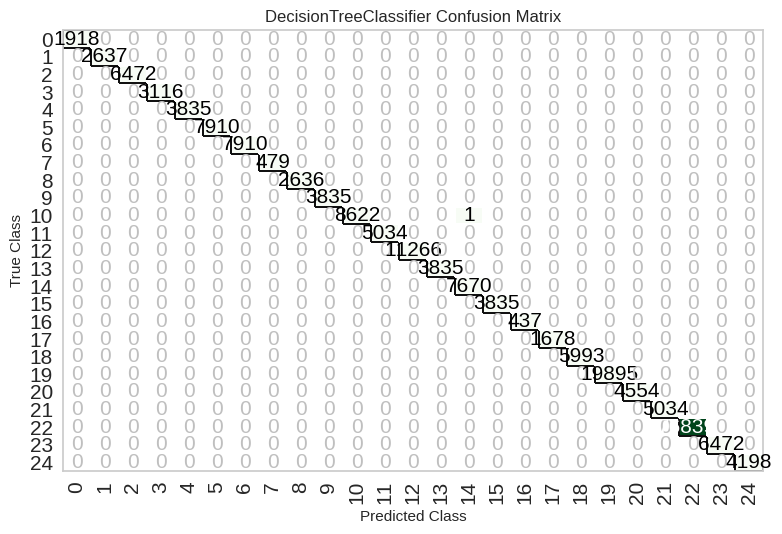

In [28]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

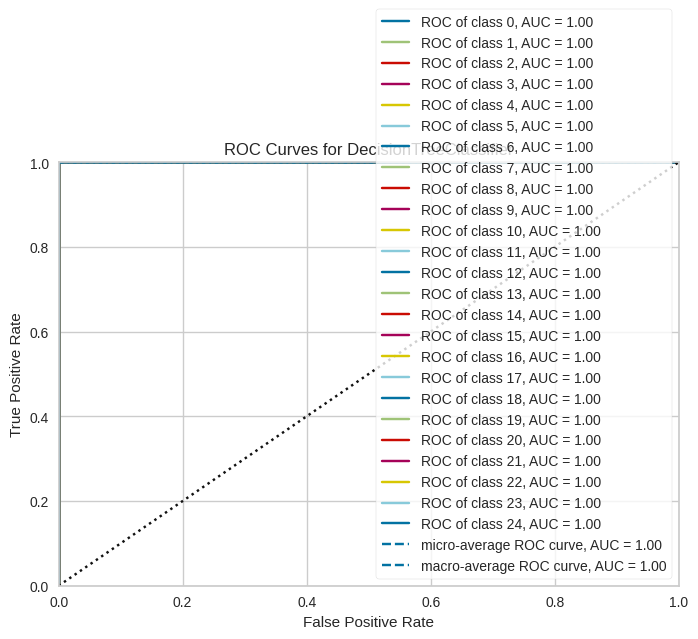

In [29]:
# plot AUC
plot_model(best, plot = 'auc')

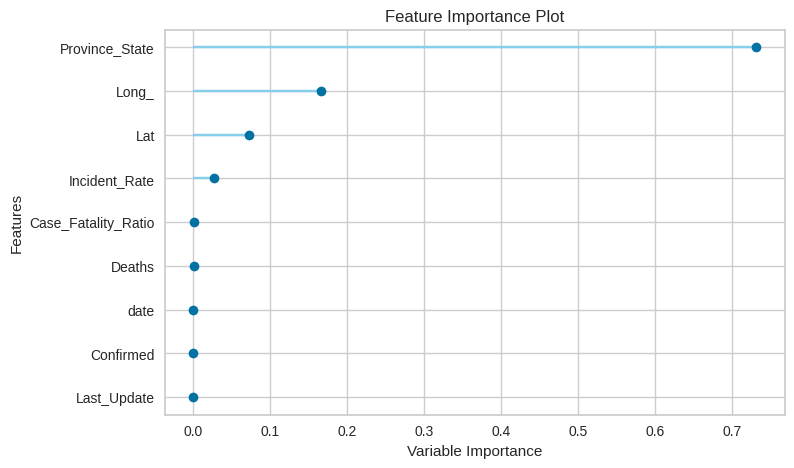

In [30]:
# plot feature importance
plot_model(best, plot = 'feature')

In [31]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [32]:
# show predictions df
holdout_pred.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio,date,Country_Region,prediction_label,prediction_score
2840963,Missouri,2022-12-09 04:21:05,37.976639,-91.305283,6307,115,26367.056641,1.823371,12-08-2022,22,US,1.0
1696274,Minnesota,2022-02-27 04:21:04,44.022404,-93.226273,10202,57,27837.048828,0.558714,02-26-2022,22,US,1.0
263137,Missouri,2021-03-07 05:21:54,37.157722,-91.401901,483,12,5914.768555,2.484472,03-06-2021,22,US,1.0
1620617,North Dakota,2022-02-08 04:21:15,47.115303,-101.340614,319,4,16130.678711,1.265823,02-07-2022,22,US,1.0
1415056,Michigan,2021-12-19 04:21:11,43.554375,-85.800697,8556,124,17468.353516,1.449275,12-18-2021,22,US,1.0


In [33]:
# predict model on new_data
predictions = predict_model(best, data = df_test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio,date,Country_Region,prediction_label,prediction_score
1901834,Ohio,2022-04-19 04:21:00,41.123512,-83.127831,12750,230,23107.035156,1.788235,04-18-2022,22,US,1.0
1757454,Pennsylvania,2022-03-14 04:20:46,41.649384,-75.299568,10041,167,19549.853516,1.663181,03-13-2022,22,US,1.0
1817977,Tennessee,2022-03-29 04:20:46,35.780773,-83.522446,30297,406,30784.732422,1.325795,03-28-2022,22,US,1.0
43621,Texas,2021-01-11 05:21:50,33.618866,-95.048416,543,27,4167.013184,5.389222,01-10-2021,22,US,1.0
862850,Wisconsin,2021-08-03 04:21:39,43.720997,-87.945793,15026,171,13027.570312,1.138027,08-02-2021,22,US,1.0


In [34]:
ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'clsificacion_Country_Region_Desarrollo='+str(MODO_DESARROLLO)
save_model(best, ruta_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Lat', 'Long_', 'Confirmed',
                                              'Deaths', 'Incident_Rate',
                                              'Case_Fatality_Ratio'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value...
                                                               hierarchy=None,
                                                               min_samples_leaf=20,
                                                               r

In [35]:
# load pipeline
loaded_best_pipeline = load_model(ruta_modelo)
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Lat', 'Long_', 'Confirmed',
                                             'Deaths', 'Incident_Rate',
                                             'Case_Fatality_Ratio'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True...
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)